In [1]:
from train import Train
import yaml
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt

In [3]:
# Segmentation of training, test, and validation sets

In [4]:
def train_test(dataset,seed):
    columns=dataset.columns
    N=len(dataset['SMILES'])
    if N<=10:
        pass
    else:
        P=round(N*0.9)
    seed =seed
    np.random.seed(seed)
    train_indices = list(np.random.choice(N,P, replace=False) )
    test_indices= list(np.array(list(set(range(N)) - set(train_indices))) )
    dataset_train = dataset.loc[train_indices,columns]
    dataset_test = dataset.loc[test_indices,columns]
    return dataset_train,dataset_test

def train_val(dataset,seed):
    columns=dataset.columns
    N=list(dataset['id'])
    seed =seed
    np.random.seed(seed)
    train_indices = list(np.random.choice(N,round(len(N)*0.9), replace=False) )
    val_indices= list(np.array(list(set(N) - set(train_indices))))
    dataset_train = dataset.loc[train_indices,columns]
    dataset_val = dataset.loc[val_indices,columns]
    return dataset_train,dataset_val

def data_process(X = None, y=None,Adduct=None,frac = [0.8, 0.1, 0.1], random_seed = 1):
    print('Property Prediction Mode...')
    df_data = pd.DataFrame(zip(X, y,Adduct))
    df_data.rename(columns={0:'SMILES',1: 'Label',2: 'Adduct'},inplace=True)
    print('in total: ' + str(len(df_data)) + ' mols')
    print('unique mols: ' + str(len(df_data['SMILES'].unique())))
    df_data['id'] = range(len(df_data['SMILES']))
    train, test = train_test(df_data,seed=100)
    train,val = train_val(train,seed=100)
    print('Done.')
    return train.reset_index(drop=True),val.reset_index(drop=True), val.reset_index(drop=True)

In [5]:
#Plot function for testing set results

In [6]:
def test_plot(res,config):
    r2 = r2_score(res['Label'], res['predict'])
    mae = mean_absolute_error(res['Label'], res['predict'])
    medae = median_absolute_error(res['Label'], res['predict'])
    rmae = np.mean(np.abs(res['Label'] - res['predict']) / res['Label']) * 100
    median_re = np.median(np.abs(res['Label'] - res['predict']) / res['Label'])
    mean_re=np.mean(np.abs(res['Label'] - res['predict']) / res['Label'])
    plt.plot(res ['Label'], res['predict'], '.', color = 'blue')
    plt.plot([0,500], [0,500], color ='red')
    plt.ylabel('Predicted CCS')
    plt.xlabel('Experimental CCS')
    plt.text(0,500, 'R2='+str(round(r2,4)), fontsize=10)
    plt.text(180,500,'MAE='+str(round(mae,4)),fontsize=10)
    plt.text(0, 450, 'MedAE='+str(round(medae,4)), fontsize=10)
    plt.text(180, 450, 'MRE='+str(round(mean_re,4)), fontsize=10)
    plt.text(0, 400, 'MedRE='+str(round(median_re,4)), fontsize=10)
    plt.show()

In [8]:
config = yaml.load(open("config.yaml", "r"), Loader=yaml.FullLoader)
dataset = pd.read_csv('ccsbase_4_2.csv')
smiles = np.array(list(dataset['SMI']))
y = np.array(list(dataset['CCS']))
add = np.array(list(dataset['Adduct']))
train, val,test = data_process(X = smiles, y = y, Adduct = add,
                                frac = [0.9, 0.1, 0.1],random_seed = 1)

Property Prediction Mode...
in total: 6237 mols
unique mols: 4584
Done.


In [9]:
graphccs = Train(train,val,test,**config)

calculating molecular graphs


100%|██████████████████████████████████████████████████████████████████████████████| 5052/5052 [02:31<00:00, 33.46it/s]


calculating molecular graphs


100%|████████████████████████████████████████████████████████████████████████████████| 561/561 [00:16<00:00, 33.37it/s]


calculating molecular graphs


100%|████████████████████████████████████████████████████████████████████████████████| 561/561 [00:16<00:00, 33.23it/s]


Training at Epoch 1 iteration 0 with loss 56866.3. Total time 0.00027 hours
Training at Epoch 1 iteration 100 with loss 649.795. Total time 0.00055 hours
Validation at Epoch 1 , MSE: 249.735 , Pearson Correlation: 0.97262 with p-value: 0.00E+00 , Concordance Index: 0.92671
Training at Epoch 2 iteration 0 with loss 384.325. Total time 0.00083 hours
Training at Epoch 2 iteration 100 with loss 743.248. Total time 0.00111 hours
Validation at Epoch 2 , MSE: 159.287 , Pearson Correlation: 0.98551 with p-value: 0.00E+00 , Concordance Index: 0.94308
Training at Epoch 3 iteration 0 with loss 126.923. Total time 0.00111 hours
Training at Epoch 3 iteration 100 with loss 105.917. Total time 0.00138 hours
Validation at Epoch 3 , MSE: 151.561 , Pearson Correlation: 0.98842 with p-value: 0.00E+00 , Concordance Index: 0.95027
Training at Epoch 4 iteration 0 with loss 105.763. Total time 0.00166 hours
Training at Epoch 4 iteration 100 with loss 152.798. Total time 0.00194 hours
Validation at Epoch 4 , 

Training at Epoch 44 iteration 100 with loss 110.352. Total time 0.01722 hours
Training at Epoch 45 iteration 0 with loss 46.1088. Total time 0.0175 hours
Training at Epoch 45 iteration 100 with loss 33.0804. Total time 0.01777 hours
Training at Epoch 46 iteration 0 with loss 55.0542. Total time 0.01777 hours
Training at Epoch 46 iteration 100 with loss 68.3137. Total time 0.01805 hours
Training at Epoch 47 iteration 0 with loss 65.2778. Total time 0.01833 hours
Training at Epoch 47 iteration 100 with loss 55.5374. Total time 0.01861 hours
Training at Epoch 48 iteration 0 with loss 86.6203. Total time 0.01861 hours
Training at Epoch 48 iteration 100 with loss 62.3710. Total time 0.01888 hours
Training at Epoch 49 iteration 0 with loss 29.1205. Total time 0.01888 hours
Training at Epoch 49 iteration 100 with loss 41.1152. Total time 0.01916 hours
Validation at Epoch 49 , MSE: 33.3644 , Pearson Correlation: 0.99595 with p-value: 0.00E+00 , Concordance Index: 0.96825
Training at Epoch 50 

Training at Epoch 92 iteration 100 with loss 41.6396. Total time 0.035 hours
Training at Epoch 93 iteration 0 with loss 66.7813. Total time 0.03527 hours
Training at Epoch 93 iteration 100 with loss 29.1813. Total time 0.03555 hours
Training at Epoch 94 iteration 0 with loss 45.2765. Total time 0.03555 hours
Training at Epoch 94 iteration 100 with loss 32.6751. Total time 0.03583 hours
Training at Epoch 95 iteration 0 with loss 39.1453. Total time 0.03611 hours
Training at Epoch 95 iteration 100 with loss 80.5392. Total time 0.03611 hours
Training at Epoch 96 iteration 0 with loss 28.6570. Total time 0.03638 hours
Training at Epoch 96 iteration 100 with loss 39.1921. Total time 0.03666 hours
Training at Epoch 97 iteration 0 with loss 36.6221. Total time 0.03666 hours
Training at Epoch 97 iteration 100 with loss 35.1238. Total time 0.03694 hours
Training at Epoch 98 iteration 0 with loss 39.9916. Total time 0.03722 hours
Training at Epoch 98 iteration 100 with loss 80.1105. Total time 0

Training at Epoch 144 iteration 0 with loss 30.4591. Total time 0.05527 hours
Training at Epoch 144 iteration 100 with loss 21.6526. Total time 0.05555 hours
Training at Epoch 145 iteration 0 with loss 33.5723. Total time 0.05555 hours
Training at Epoch 145 iteration 100 with loss 20.4724. Total time 0.05583 hours
Training at Epoch 146 iteration 0 with loss 33.1845. Total time 0.05611 hours
Training at Epoch 146 iteration 100 with loss 22.2646. Total time 0.05638 hours
Training at Epoch 147 iteration 0 with loss 25.3243. Total time 0.05638 hours
Training at Epoch 147 iteration 100 with loss 30.4099. Total time 0.05666 hours
Training at Epoch 148 iteration 0 with loss 25.9502. Total time 0.05694 hours
Training at Epoch 148 iteration 100 with loss 40.2352. Total time 0.05694 hours
Training at Epoch 149 iteration 0 with loss 15.8150. Total time 0.05722 hours
Training at Epoch 149 iteration 100 with loss 24.5037. Total time 0.0575 hours
Training at Epoch 150 iteration 0 with loss 25.3640. 

Training at Epoch 196 iteration 0 with loss 31.8330. Total time 0.07472 hours
Training at Epoch 196 iteration 100 with loss 25.2043. Total time 0.075 hours
Training at Epoch 197 iteration 0 with loss 18.8496. Total time 0.07527 hours
Training at Epoch 197 iteration 100 with loss 26.3451. Total time 0.07555 hours
Training at Epoch 198 iteration 0 with loss 25.0190. Total time 0.07555 hours
Training at Epoch 198 iteration 100 with loss 26.9912. Total time 0.07583 hours
Training at Epoch 199 iteration 0 with loss 46.1845. Total time 0.07611 hours
Training at Epoch 199 iteration 100 with loss 30.1121. Total time 0.07638 hours
Training at Epoch 200 iteration 0 with loss 12.3062. Total time 0.07638 hours
Training at Epoch 200 iteration 100 with loss 26.7859. Total time 0.07666 hours
Training at Epoch 201 iteration 0 with loss 26.9084. Total time 0.07694 hours
Training at Epoch 201 iteration 100 with loss 21.4954. Total time 0.07722 hours
Training at Epoch 202 iteration 0 with loss 241.963. T

Training at Epoch 248 iteration 0 with loss 30.4964. Total time 0.09444 hours
Training at Epoch 248 iteration 100 with loss 25.4186. Total time 0.09472 hours
Training at Epoch 249 iteration 0 with loss 25.6497. Total time 0.095 hours
Training at Epoch 249 iteration 100 with loss 22.9028. Total time 0.095 hours
Training at Epoch 250 iteration 0 with loss 25.8939. Total time 0.09527 hours
Training at Epoch 250 iteration 100 with loss 18.3222. Total time 0.09555 hours
--- Go for Testing ---
Testing MSE: 29.498354704060144 , Pearson Correlation: 0.996269284617899 with p-value: 0.00E+00 , Concordance Index: 0.9686538939084258


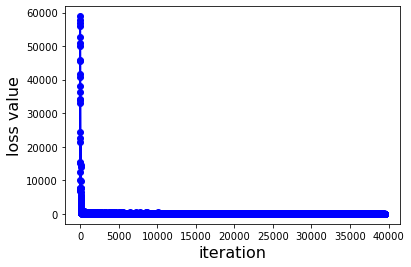

In [10]:
graphccs.train_()

In [12]:
test['predict']=''
a=list(np.load(config['result_folder'] +'DGL_GCN_logits.npy'))
for i in range(len(test['SMILES'])):
    test['predict'][i]=a[i]

C:\Users\ZNDX002\.conda\envs\GCN\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


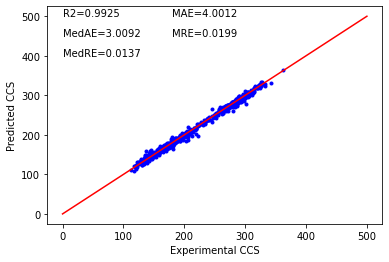

In [13]:
test_plot(test,config)